In [1]:
import numpy as np

# Matplotlib


[MatPlotLib](http://matplotlib.org/) est la bibliothèque de référence pour faire des graphes, c'est aussi la plus ancienne et il faut admettre qu'elle n'est pas toujours simple d'usage.

#### Note pour Jupyter

Dans Jupyter, il est nécessaire de spécifier que l'on désire que les figures soient inclues dans la feuille HTML. Cela se fait ainsi :

```
%matplotlib inline
```

et si vous avez un écran avec une haute résolution, utilisez le rendu retina avec :

```
%config InlineBackend.figure_format = 'retina'
```
Vous pouvez tester avec et sans cette dernière option pour voir la différence (il faut relancer la feuille).

# Matplotlib


[MatPlotLib](http://matplotlib.org/) is the reference library for plotting, it is also the oldest and it must be admitted that it is not always easy to use.

#### Note for Jupyter

In Jupyter, it is necessary to specify that you want the figures to be included in the HTML sheet. This is done as follows:

```
% matplotlib inline
```

and if you have a screen with high resolution, use retina rendering with:

```
% config InlineBackend.figure_format = 'retina'
```
You can test with and without this last option to see the difference (you have to restart the kernel).

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

## Les courbes

Tracer une courbe revient à donner à la fonction `plot` deux vecteurs de même taille, les valeurs de x et celles de y.

## The curves

Graphing a function is equivalent to give two vectors of the same size, x and y values, to the `plot` function.

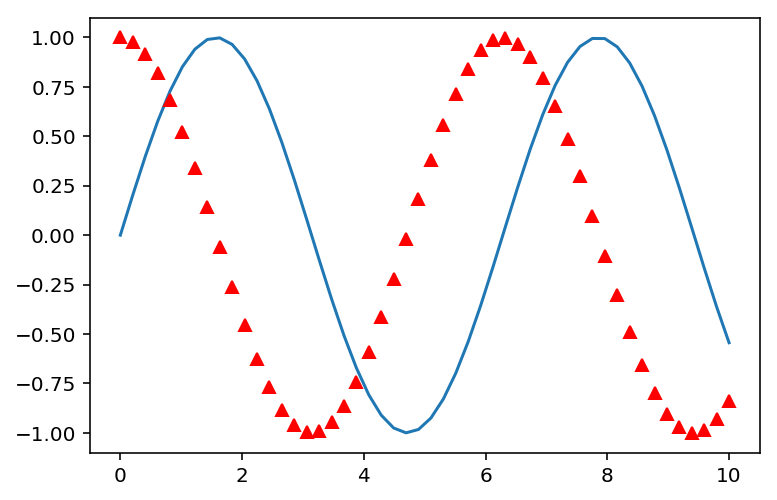

In [3]:
x = np.linspace(0,10,50)  # (start, end, number of values)
y = np.sin(x)

plt.plot(x,y)
plt.plot(x, np.cos(x), 'r^')

Où `'r ^'` signifie triangles rouges. Voici les choix pour faire le mot magique qui permet de décrire le style de la courbe:

* couleur = (`b`: bleu, `g`: vert, `r`: rouge, `c`: cyan, `m`: magenta, `y`: jaune, `k`: noir, `w`: blanc)
* marqueurs = (`o`, `v`, `^`, `<`, `>`, `8`, `s`, `p`, `*`, `h`, `H`, `D`, `d`) (cf [doc plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) section Notes)
* style de line = (`:` = dessine en pointillé, `-` = continu, `-.` = tiret-point, `--`= tirets)

Where `'r ^'` means red triangles. Here are the choices to make the magic string that describes the style of the curve:

* color = (`b`: blue,` g`: green, `r`: red,` c`: cyan, `m`: magenta,` y`: yellow, `k`: black,` w `: white)
* markers = (`o`, `v`, `^`, `<`, `>`, `8`, `s`, `p`, `*`, `h`, `H`, `D`, `d`) (see [doc plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) section Notes)
* style of line = (`:` = dotted line, `-` = continuous,` -.` = dash-dot, `--` = dashes)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


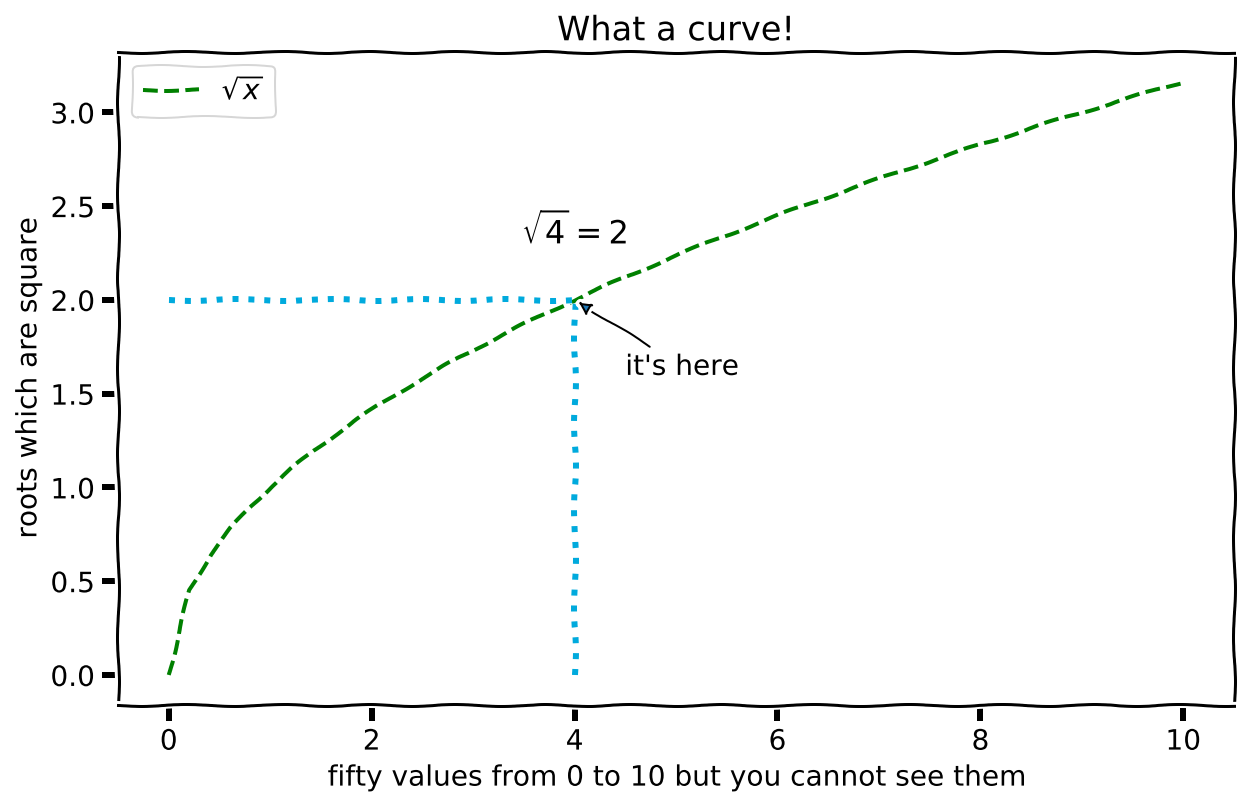

In [4]:
fig = plt.figure(figsize=(10,6))
with plt.xkcd():                      # xkcd is a style from the comics of the same name
    plt.title(u"What a curve!")
    plt.xlabel('fifty values from 0 to 10 but you cannot see them')
    plt.ylabel('roots which are square')
    plt.plot(x, np.sqrt(x), '--g', label=r"$\sqrt{x}$") # LaTeX math string
    plt.plot([0,4],[2,2],':', color = '#00aadd', lw=3)
    plt.plot([4,4],[0,2],':', color = '#00aadd', lw=3)
    plt.text(4, 2.3, r"$\sqrt{4} = 2$", horizontalalignment='center',size=16)  # LaTeX text with r"$...$"
    plt.annotate(r"it's here", xy=(4,2), xytext=(4.5,1.6), arrowprops=dict(arrowstyle="-|>"))
    plt.legend()

## Courbes + barres avec deux échelles

Voici une figure avec 

* les dates en abscisse, 
* le chiffre d'affaire sous forme de barres avec son axe y à gauche,
* le nombre d'utilisateur de PayPal sous forme de courbes avec son axe y à droite.

La première partie est simplement les données. La figure commence à `f1 = plt.subplots`. On a besoin d'utiliser [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) et `twinx` pour avoir les deux dessins dans la même figure. Comme les dessins sont supperposés, on n'utilise qu'une seule sous-figure pour les deux dessins `ax1` et `ax2`. 

Finalement on modifie certains paramètres par défaut pour choisir où on positionne la légende et la taille de la police.

Notez que si on inverse les deux dessins alors les barres seront dessinées par dessus les courbes. Pour continuer à voir les courbes il faut alors utiliser la transparence avec le paramètre `alpha` (0 = transparent, 1 = opaque).

## Curves + bars with two scales

Here is a figure with

* dates on the x-axis,
* the incomes in the form of bars with its y-axis on the left,
* the number of PayPal users as curves with its y-axis on the right.

The first part is just the data. The figure starts at `f1 = plt.subplots`. We need to use [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) and` twinx` to have both drawings in the same figure. Since the drawings are superimposed, only one sub-figure is used for the two drawings `ax1` and` ax2`.

Finally some default settings are changed to choose where to place the caption and font size.

Note that if we reverse the two drawings then the bars will be drawn over the curves. To continue to see the curves it is necessary to use the transparency with the parameter `alpha` (0 = transparent, 1 = opaque).

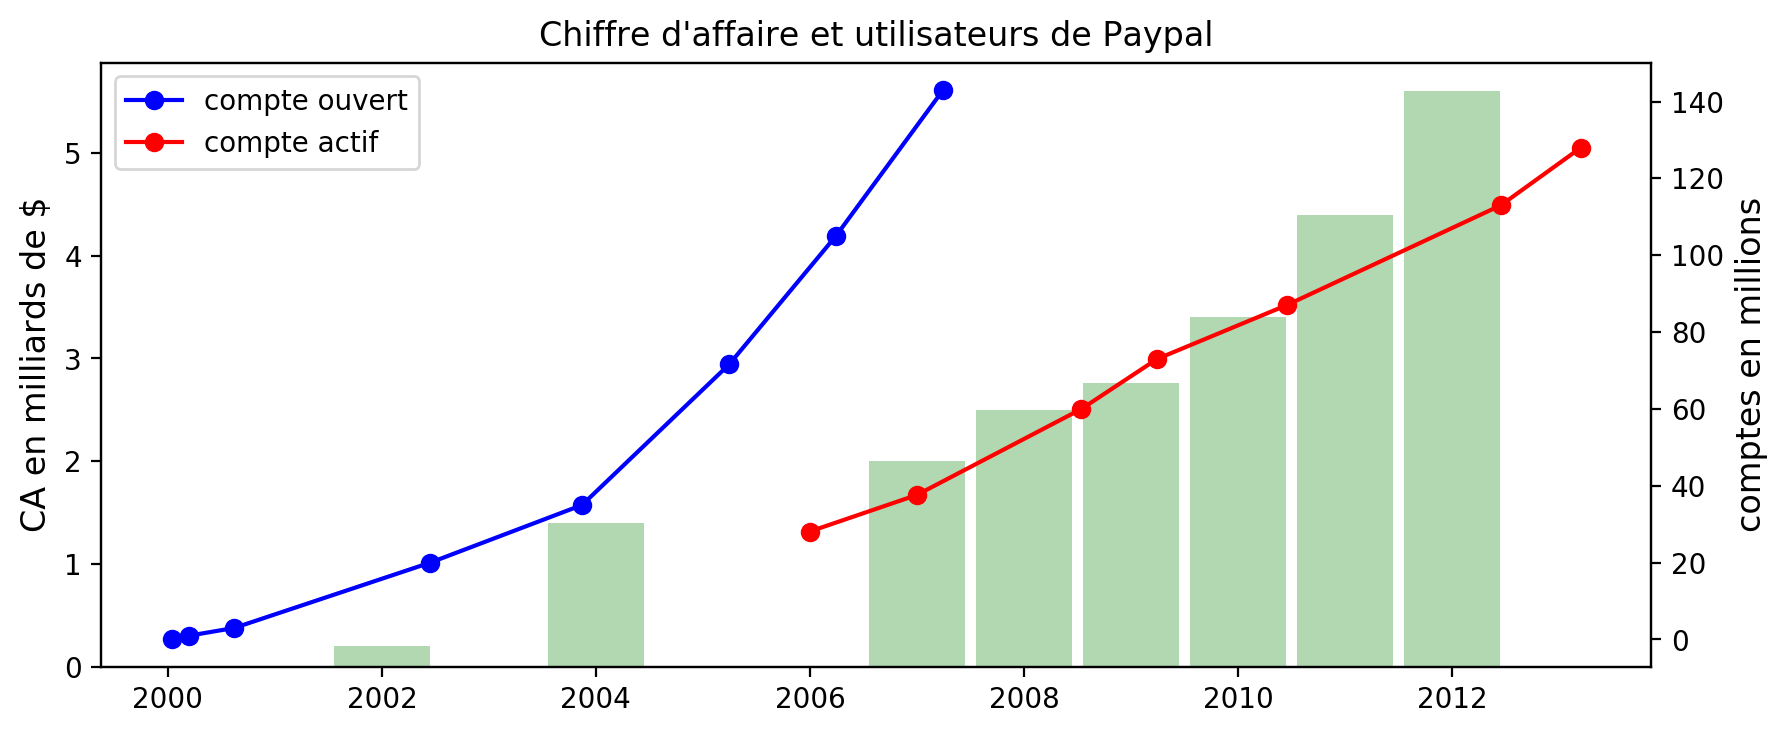

In [5]:
import matplotlib.dates as dates
dates.DateFormatter('%d/%m/%Y')

comptes = {'15/01/00':0.1, '15/03/00':1, '15/08/00':3, '15/06/02':20, '15/11/03':35, '31/03/05':71.6, '31/03/07':143, '30/03/06':105}
new_comptes = {dates.datestr2num(i):comptes[i] for i in comptes.keys()} # on convertit les dates
anc = sorted(new_comptes.keys())

actifs = {'31/12/05':28.1, '31/12/06':37.6, '15/07/08':60, '30/03/09':73, '15/06/10':87, '15/06/12':113, '15/03/13':128}
new_actifs = {dates.datestr2num(i):actifs[i] for i in actifs.keys()} # on convertit les dates
ana = sorted(new_actifs.keys())

ca = {'1/1/12':5.6, '1/1/11':4.4, '1/1/10':3.4, '1/1/09':2.76, '1/1/08':2.5, '1/1/07':2., '1/1/04':1.4, '1/1/02':.2}
new_ca = {dates.datestr2num(i):ca[i] for i in ca.keys()} # on convertit les dates
anca = sorted(new_ca.keys())

f1, ax1 = plt.subplots(figsize=(10,4), dpi=100)
ax2 = ax1.twinx() # set y axis for ax2 on the right side

ax1.set_ylabel('CA en milliards de $', fontsize='large')
ax1.bar(anca, [new_ca[i] for i in anca], width=0.9*(anca[-1]-anca[-2]), color='g', alpha=0.3, label="CA")

ax2.set_ylabel('comptes en millions', fontsize='large')
ax2.plot_date(anc, [new_comptes[i] for i in anc], 'b-o', label="compte ouvert")
ax2.plot_date(ana, [new_actifs[i] for i in ana], 'r-o', label="compte actif")

plt.title("Chiffre d'affaire et utilisateurs de Paypal")
plt.rcParams['legend.loc'] = 'upper left' # force to place the legend on the upper left corner
plt.rcParams.update({'font.size': 10})
ax2.legend()

### Sauver

Et voici comment sauver sa figure. Ici le fichier demandé est un PDF mais cela pourrait être un PNG (image) ou un SVG (figure vectorielle).

### Save

And here's how to save a figure. Here the requested file is a PDF but it could be a PNG (image) or an SVG (vector figure).

In [6]:
f1.savefig('/tmp/paypal.pdf')

!ls -l /tmp/paypal.pdf

-rw-rw-r-- 1 ricou ricou 15336 sept.  6 14:31 /tmp/paypal.pdf


## Courbe en 3D

Pour finir un exemple de courbe en 3 dimensions. Notez qu'il faut que les dessins `ax1` et `ax2` soient en 3D ce qui impose de le spécifier en ajoutant `subplot_kw = {'projection': '3d'}`.

Si vous désirez mélager des dessins 3D et des dessins 2D, il faut créer les `subplots` différemment. Regardez ce même exemple avec la fonction `add_subplot` qui définit un par un les dessins : [3D plots as subplots](https://matplotlib.org/gallery/mplot3d/subplot3d.html#sphx-glr-gallery-mplot3d-subplot3d-py).

## Curve in 3D

To finish an example of a 3-dimensional curve. Note that the drawings `ax1` and` ax2` must be in 3D which requires to specify it by adding `subplot_kw = {'projection':'3d'}`.

If you want to mix 3D drawings and 2D drawings, you need to create `subplots` differently. Take a look at this same example with the `add_ subplot` function that defines the drawings one by one: [3D plots as subplots](https://matplotlib.org/gallery/mplot3d/subplot3d.html#sphx-glr-gallery-mplot3d-subplot3d-py).

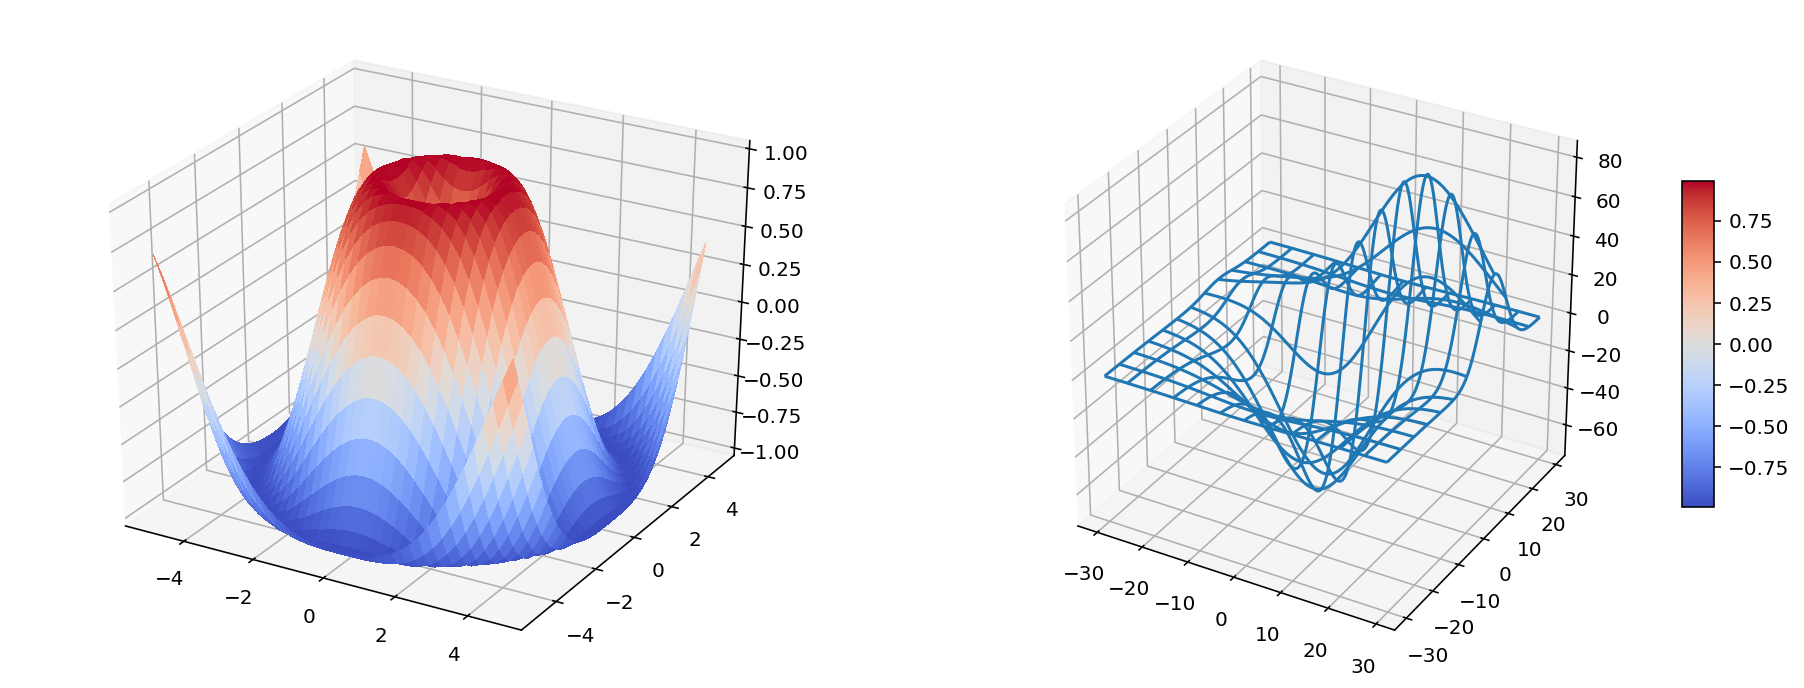

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection':'3d'})

#  First subplot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Second subplot
X, Y, Z = get_test_data(0.05)
ax2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

## Plus

Le principal avantage de MatPlotLib est que vous pouvez presque tout faire et, grâce à des milliers d’exemples, de tutoriels et d'explications, vous y arriverez peut-être ! Il peut s'agir de courbe 3D, d'histogrammes, d'images, de contours, de cammenbert, de graphiques polaires... Voici des galeries avec des exemple pour avoir une idée des possibilités :

* [La galerie officielle](http://matplotlib.org/gallery.html)
* [La petite galerie de Frédéric Rougier](http://www.loria.fr/~rougier/coding/gallery) (souvent plus facile à comprendre)

Voici quelques chiffres de la galerie officielle:

<table>
<img src="images/matplotlib_3d.png"/>
<img src="images/matplotlib_contour.png"/>
<img src="images/matplotlib_pie.png"/>

## More

The main advantage of MatPlotLib is you can do almost everything and thanks to thousands examples, tutorials, explanations, you may succeed to do it! It can be 3D, histograms, images, contours, pies, polar charts... Here are galleries with examples to get an idea of possibilities:

* [The official gallery](http://matplotlib.org/gallery.html)
* [Frédéric Rougier's small gallery](http://www.loria.fr/~rougier/coding/gallery) (often easier to understand)

Here few figures from the official gallery:

<table>
<img src="images/matplotlib_3d.png"/>
<img src="images/matplotlib_contour.png"/>
<img src="images/matplotlib_pie.png"/>

{{ PreviousNext("../lesson6 Pandas/pd10 -- getting data.ipynb", "11 -- Static graphics with Seaborn.ipynb")}}